## Доверительные интервалы для долей. Тест

https://www.coursera.org/learn/stats-for-data-analysis/quiz/KLN2e/dovieritiel-nyie-intiervaly-dlia-doliei/attempt

1. Выберите все формулы, задающие доверительный интервал для доли.

2. Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

    Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [27]:
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

`proportion_confint?`

    Parameters
    ----------
    count : int or array_array_like
        number of successes, can be pandas Series or DataFrame
    nobs : int
        total number of trials
    alpha : float in (0, 1)
        significance level, default 0.05
    method : {'normal', 'agresti_coull', 'beta', 'wilson', 'binom_test'}
        default: 'normal'
        method to use for confidence interval,
        currently available methods :

         - `normal` : asymptotic normal approximation
         - `agresti_coull` : Agresti-Coull interval
         - `beta` : Clopper-Pearson interval based on Beta distribution
         - `wilson` : Wilson Score interval
         - `jeffreys` : Jeffreys Bayesian Interval
         - `binom_test` : experimental, inversion of binom_test

    Returns
    -------
    ci_low, ci_upp : float, ndarray, or pandas Series or DataFrame
        lower and upper confidence level with coverage (approximately) 1-alpha.
        When a pandas object is returned, then the index is taken from the
        `count`.
        
        
- `count` - количество успехов в выборке
- `nobs` - количество событий, то есть размер выборки
- ` method` - метод, с помощью которого мы хотим это оценивать

In [31]:
normal_interval = proportion_confint(count=1, nobs=50, alpha=0.05, method = 'normal')
normal_interval

(0.0, 0.05880530708179099)

In [9]:
normal_interval[0]

0.0

In [48]:
from scipy import stats

def normal_proportion_confint(count, nobs, alpha=0.05):
    count = np.asarray(count)
    nobs = np.asarray(nobs)
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = stats.norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp


In [52]:
normal_interval_2 = normal_proportion_confint(count=1, nobs=50, alpha=0.05)
normal_interval_2

(-0.018805307081790987, 0.05880530708179099)

In [53]:
round(normal_interval_2[0], 4)

-0.0188

3. В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.  

In [10]:
normal_interval_wilson = proportion_confint(count=1, nobs=50, alpha=0.05, method = 'wilson')

In [11]:
normal_interval_wilson

(0.003539259271646236, 0.10495443589637815)

In [12]:
round(normal_interval_wilson[0], 4)

0.0035

5. Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

`samplesize_confint_proportion?`

    Parameters
    ----------
    proportion : float in (0, 1)
        proportion or quantile
    half_length : float in (0, 1)
        desired half length of the confidence interval
    alpha : float in (0, 1)
        significance level, default 0.05,
        coverage of the two-sided interval is (approximately) ``1 - alpha``
    method : str in ['normal']
        method to use for confidence interval,
        currently only normal approximation

    Returns
    -------
    n : float
        sample size to get the desired half length of the confidence interval
        
        
        
- `proportion` - выборочное среднее
- 

In [91]:
n_samples = samplesize_confint_proportion(proportion=1/50,
                                          half_length=0.01,
                                          alpha=0.05)
print(n_samples)
print(int(round(n_samples, 0)))

752.9259288560489
753


In [90]:
# Проверка
interval = normal_proportion_confint(count=int(753*0.02), nobs=753, alpha=0.05)
interval[1] - interval[0]

0.01995994925474251

6. Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра _**p**_. Посмотрите, при каком значении _**p**_ нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

    Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком _**p**_ , всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

    Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?  

In [92]:
import matplotlib.pyplot as plt

In [93]:
proprtions = np.arange(0, 1, 0.01)
sample_sizes = []

In [94]:
for p in proprtions:
    sample_sizes.append(samplesize_confint_proportion(p, 0.01))

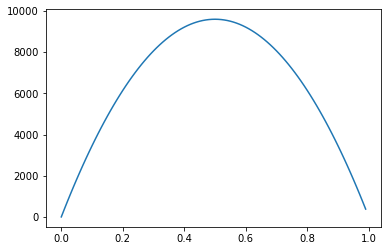

In [95]:
plt.plot(proprtions, sample_sizes)
plt.show()

In [96]:
samplesize_confint_proportion(0.5, 0.01)

9603.647051735317